<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°06

## Objetivos de la clase

* Reforzar los conceptos básicos del E.D.A..

## Contenidos

* [Problema 01](#p1)


## Problema 01
<img src="./images/logo_iris.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [48]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [49]:
# cargar datos
df = pd.read_csv(os.path.join("data","iris_contaminados.csv"))
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

In [50]:
def resumen_por_columna(df,cols):
    pd_series = df[cols]
    
    # elementos distintos 
    l_unique = pd_series.unique()
    
    # elementos vacios
    
    l_vacios = pd_series[pd_series.isna()]
    
    df_info = pd.DataFrame({
        'columna': [cols],
        'unicos': [len(l_unique)],
        'vacios': [len(l_vacios)]
    })
    
    return df_info

frames = []

for col in df.columns:
    aux_df = resumen_por_columna(df,col)
    frames.append(aux_df)
    
df_info = pd.concat(frames).reset_index(drop=True)
df_info

,columna,unicos,vacios
0,sepalLength,36,1
1,sepalWidth,26,1
2,petalLength,45,1
3,petalWidth,24,1
4,species,11,1


1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [51]:
df["species"].unique()

##CORRECCIÓN

df.loc[df["species"]=='VIRGINICA','species']='virginica'
df.loc[df["species"]=="Versicolor","species"]="versicolor"
df.loc[df["species"]=="VERSICOLOR","species"]="versicolor"
df.loc[df["species"].isnull(),"species"]="default"
df.loc[df["species"]=="SETOSA","species"]="Setosa"

##FORMATO

df['species'] = df['species'].str.lower().str.strip()
df["species"].unique()

array(['setosa', 'virginica', 'versicolor', 'default'], dtype=object)

2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

<AxesSubplot:>

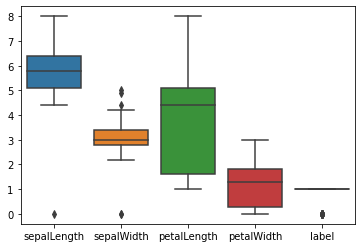

In [64]:
import seaborn as sns

df["sepalLength"].unique()


#CORRECCIÓN

df.loc[df["sepalLength"].isnull(),"sepalLength"]=0
df.loc[df["sepalWidth"].isnull(),"sepalWidth"]=0
df.loc[df["petalLength"].isnull(),"sepalWidth"]=0
df.loc[df["petalWidth"].isnull(),"petalWidth"]=0


stats_df = df.drop(['species'], axis=1)
sns.boxplot(data=stats_df)

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [62]:
#FILTRAR MAGNITUDES

mask_SL_inf =  df['sepalLength']>=4
mask_SL_sup =  df['sepalLength']<=7

mask_SW_inf =  df['sepalWidth']>=2
mask_SW_sup =  df['sepalWidth']<=4.5

mask_PL_inf =  df['petalLength']>=1
mask_PL_sup =  df['petalLength']<=7

mask_PW_inf =  df['petalWidth']>=0.1
mask_PW_sup =  df['petalWidth']<=2.5

mask_SL = mask_SL_inf & mask_SL_sup
mask_SW = mask_SW_inf & mask_SW_sup
mask_PL = mask_PL_inf & mask_PL_sup
mask_PW = mask_PW_inf & mask_PW_sup

df["label"]= mask_SL & mask_SW & mask_PL & mask_PW
df

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,4.4,3.2,1.3,3.0,setosa,False
1,7.2,3.6,6.1,2.5,virginica,False
2,6.3,3.3,6.0,2.5,virginica,True
3,6.7,3.3,5.7,2.5,virginica,True
4,6.3,3.4,5.6,2.4,virginica,True
...,...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,setosa,True
146,4.8,3.0,1.4,0.1,setosa,True
147,4.9,3.1,1.5,0.1,setosa,True
148,4.9,3.6,1.4,0.1,setosa,True


4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

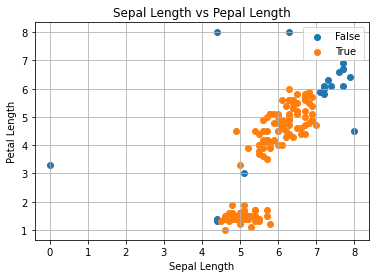

In [74]:
# grafic

fig, ax = plt.subplots()

for label in df["label"].unique():
    x= df.loc[df["label"]==label, "sepalLength"]
    y= df.loc[df["label"]==label, "petalLength"]
    ax.scatter(x, y, label=label)

ax.legend()
ax.grid(True)

plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.title("Sepal Length vs Pepal Length")
plt.show()

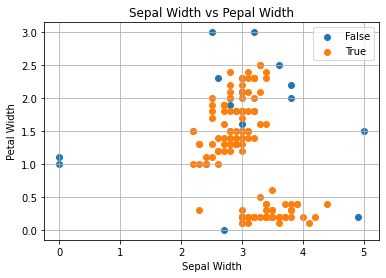

In [68]:
# grafic

fig, ax = plt.subplots()

for label in df["label"].unique():
    x= df.loc[df["label"]==label, "sepalWidth"]
    y= df.loc[df["label"]==label, "petalWidth"]
    ax.scatter(x, y, label=label)

ax.legend()
ax.grid(True)

plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.title("Sepal Width vs Pepal Width")
plt.show()

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

Text(0, 0.5, 'petalLength')

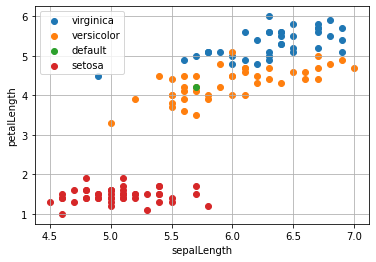

In [102]:
df_aux = df.loc[df['label']==True]
fig,ax = plt.subplots()
for specie in df_aux['species'].unique():
    x_axis = df_aux.loc[df_aux['species']==specie, 'sepalLength']
    y_axis = df_aux.loc[df_aux['species']==specie, 'petalLength']
    ax.scatter(x_axis,y_axis,label=specie)

ax.legend()
ax.grid(True)

plt.xlabel('sepalLength')
plt.ylabel('petalLength')